## Explain the effect of national factors on home prices in the US

Task: Find publicly available data for key factors that influence US home prices nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices:

Approach: Use the following key factors and explains how these factors impacted home prices over the last 20 years.

    1.Unemployment Rate
    2.Employment Rate
    3.Per Capita GDP
    4.Construction Materials Prices
    5.Interest Rates
    6.Housing subsidies
    7.Number of Households
    8.Consumer Price Index (CPI)
    9.Real Median Household Income
    10.Working Age Population

As a proxy to the home prices, S&P CASE-SHILLER Index is used.

Note:- Most of the data is downloaded from [https://fred.stlouisfed.org/].


Data for all the key factors is downloaded, preprocessed, and combined to create a dataset using the Extract Transform Load (ETL) method. Data for different variables had different frequencies. So, to combine the data, the necessary interpolations are made.

## Import some libraries

In [1]:
#Import some libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Perform ETL ( Extract Transform Load )

### Case Schiller Home Price Index Data  ( Monthly Data )

In [3]:
#Import CASE-SCHILLER Home Price Index data from excel file
Df_Case_Schiller = pd.read_excel(r"C:\Users\HP\HOME LLC\S&PCase Shiller U.S. National Home Price Index.xls")
Df_Case_Schiller.head()

,observation_date,CSUSHPISA
0,2003-01-01,128.461
1,2003-02-01,129.355
2,2003-03-01,130.148
3,2003-04-01,130.884
4,2003-05-01,131.735


In [4]:
#Rename the columns name
Df_Case_Schiller = Df_Case_Schiller.rename(columns={'observation_date': 'Date',
                                                   'CSUSHPISA': 'S&P Case Shiller (HPI)'})

In [5]:
# Changing dtype of date column
Df_Case_Schiller["Date"] = pd.to_datetime(Df_Case_Schiller["Date"])

In [6]:
# Selecting data till September 2023
September = Df_Case_Schiller["Date"] <= "2023-09-01"
Df_Case_Schiller = Df_Case_Schiller[September]

#Resetting Index
Df_Case_Schiller.reset_index(inplace = True)
Df_Case_Schiller.drop(columns = ["index"], inplace = True)

In [7]:
# Creating seperate Year and Month columns from Date and create a DataFrame
Df_Case_Schiller["Year"] = pd.DatetimeIndex(Df_Case_Schiller["Date"]).year
Df_Case_Schiller["Month"] = pd.DatetimeIndex(Df_Case_Schiller["Date"]).month

#Fetch top 5 rows from DataFrame
Df_Case_Schiller.head()

,Date,S&P Case Shiller (HPI),Year,Month
0,2003-01-01,128.461,2003,1
1,2003-02-01,129.355,2003,2
2,2003-03-01,130.148,2003,3
3,2003-04-01,130.884,2003,4
4,2003-05-01,131.735,2003,5


In [8]:
#Fetch Bottom 5 rows from DataFrame
Df_Case_Schiller.tail()

,Date,S&P Case Shiller (HPI),Year,Month
242,2023-03-01,298.637,2023,3
243,2023-04-01,300.213,2023,4
244,2023-05-01,302.566,2023,5
245,2023-06-01,304.593,2023,6
246,2023-07-01,306.767,2023,7


In [9]:
#Shape of Case schiller index
print("Shape of the CASE-SCHILLER Index:- ", Df_Case_Schiller.shape)

Shape of the CASE-SCHILLER Index:-  (247, 4)


### Unemployment Rate Data  ( Monthly Data )

In [10]:
#Import Unemployment Rate Data from excel file and create DataFrame
Df_Unrate = pd.read_excel(r"C:\Users\HP\HOME LLC\Unemployment Rate.xls")

#Fetch top 5 rows from DataFrame
Df_Unrate.head()

,observation_date,UNRATE
0,2003-01-01,5.8
1,2003-02-01,5.9
2,2003-03-01,5.9
3,2003-04-01,6.0
4,2003-05-01,6.1


In [11]:
#Rename the columns name
Df_Unrate = Df_Unrate.rename(columns={'observation_date': 'Date',
                                      'UNRATE': 'Unemployment Rate'})

#Fetch bottom 5 rows from DataFrame
Df_Unrate.tail()

,Date,Unemployment Rate
242,2023-03-01,3.5
243,2023-04-01,3.4
244,2023-05-01,3.7
245,2023-06-01,3.6
246,2023-07-01,3.5


In [12]:
#Shape of Unemployment Rate Data
print("Unemployment Rate Data:- ", Df_Unrate.shape)

Unemployment Rate Data:-  (247, 2)


### Employment Rate Data  ( Monthly Data )

In [13]:
#Import Employment Rate Data from excel file and create DataFrame
Df_Emprate = pd.read_excel(r"C:\Users\HP\HOME LLC\Employment Rate.xls")

#Fetch top 5 rows from DataFrame
Df_Emprate.head()

,observation_date,LREM64TTUSM156S
0,2003-01-01,71.589831
1,2003-02-01,71.521431
2,2003-03-01,71.397567
3,2003-04-01,71.377392
4,2003-05-01,71.213067


In [14]:
#Rename the columns name
Df_Emprate = Df_Emprate.rename(columns={'observation_date': 'Date',
                                      'LREM64TTUSM156S': 'Employment Rate'})

#Fetch bottom 5 rows from DataFrame
Df_Emprate.tail()

,Date,Employment Rate
242,2023-03-01,71.897483
243,2023-04-01,71.982265
244,2023-05-01,71.932981
245,2023-06-01,71.993242
246,2023-07-01,71.953523


In [15]:
#Shape of Employment Rate Data
print("Employment Rate Data:- ", Df_Emprate.shape)

Employment Rate Data:-  (247, 2)


### Per Capita GDP Data  ( Quarterly Data )

In [18]:
#Import Per Capita GDP Data from excel file and create DataFrame
Df_PC_GDP = pd.read_excel(r"C:\Users\HP\HOME LLC\Per Capita GDP.xls")

#Fetch top 5 rows from DataFrame
Df_PC_GDP.head()

,observation_date,A939RX0Q048SBEA
0,2003-01-01,50462
1,2003-04-01,50796
2,2003-07-01,51512
3,2003-10-01,51986
4,2004-01-01,52179


In [19]:
#Rename the columns name
Df_PC_GDP = Df_PC_GDP.rename(columns={'observation_date': 'Date',
                                      'A939RX0Q048SBEA': 'Per Capita GDP'})

#Fetch bottom 5 rows from DataFrame
Df_PC_GDP.tail()

,Date,Per Capita GDP
78,2022-07-01,65462
79,2022-10-01,65783
80,2023-01-01,66078
81,2023-04-01,66341
82,2023-07-01,67083


In [20]:
#Shape of Per capita GDP Data
print("Per capita GDP Data:- ", Df_PC_GDP.shape)

Per capita GDP Data:-  (83, 2)


### Construction Material Data  ( Monthly Data )

In [21]:
#Import Construction material Data from excel file and create DataFrame
Df_Const_Mdata = pd.read_excel(r"C:\Users\HP\HOME LLC\Construction Materials Data.xls")

#Fetch top 5 rows from DataFrame
Df_Const_Mdata.head()

,observation_date,WPUSI012011
0,2003-01-01,144.4
1,2003-02-01,145.2
2,2003-03-01,145.2
3,2003-04-01,145.9
4,2003-05-01,145.8


In [22]:
#Rename the columns name
Df_Const_Mdata = Df_Const_Mdata.rename(columns={'observation_date': 'Date',
                                                'WPUSI012011': 'Construction material'})

#Fetch bottom 5 rows from DataFrame
Df_Const_Mdata.tail()

,Date,Construction material
242,2023-03-01,331.729
243,2023-04-01,333.366
244,2023-05-01,337.473
245,2023-06-01,337.336
246,2023-07-01,334.576


In [23]:
#Shape of Construction Material Data
print("Construction Material Data:- ", Df_Const_Mdata.shape)

Construction Material Data:-  (247, 2)


### Interest Rate Data ( Monthly Data )

In [24]:
#Import Interest Rate Data from excel file and create DataFrame
Df_Int_rate = pd.read_excel(r"C:\Users\HP\HOME LLC\Interest Rates.xls")

#Fetch top 5 rows from DataFrame
Df_Int_rate.head()

,observation_date,FEDFUNDS
0,2003-01-01,1.24
1,2003-02-01,1.26
2,2003-03-01,1.25
3,2003-04-01,1.26
4,2003-05-01,1.26


In [25]:
#Rename the columns name
Df_Int_rate = Df_Int_rate.rename(columns={'observation_date': 'Date',
                                          'FEDFUNDS': 'Interest Rate'})

#Fetch bottom 5 rows from DataFrame
Df_Int_rate.tail()

,Date,Interest Rate
242,2023-03-01,4.65
243,2023-04-01,4.83
244,2023-05-01,5.06
245,2023-06-01,5.08
246,2023-07-01,5.12


In [26]:
#Shape of Interest Rate Data
print("Interest Rate Data:- ", Df_Int_rate.shape)

Interest Rate Data:-  (247, 2)


### Housing Subsidies (Federal) ( Annual Data )

In [30]:
#Import Housing Subsidies (Federal) Data from excel file and create DataFrame
Df_HO_Sub = pd.read_excel(r"C:\Users\HP\HOME LLC\Housing Subsidies (Federal).xls")

#Fetch top 5 rows from DataFrame
Df_HO_Sub.head()

,observation_date,L312051A027NBEA
0,2003-01-01,25.930
1,2004-01-01,27.201
2,2005-01-01,27.651
3,2006-01-01,28.604
4,2007-01-01,29.512


In [31]:
#Rename the columns name
Df_HO_Sub = Df_HO_Sub.rename(columns={'observation_date': 'Date',
                                        'L312051A027NBEA': 'Housing Subsidies'})

#Fetch bottom 5 rows from DataFrame
Df_HO_Sub.tail()

,Date,Housing Subsidies
15,2018-01-01,38.859
16,2019-01-01,40.185
17,2020-01-01,44.147
18,2021-01-01,45.299
19,2022-01-01,48.021


In [32]:
#Shape of Housing Subsidies Data
print("Housing Subsidies Data:- ", Df_HO_Sub.shape)

Housing Subsidies Data:-  (20, 2)


### Number of Households (Total households)  ( Annual Data )

In [33]:
#Import Number of Households (Total households) Data from excel file and create DataFrame
Df_TTLHH = pd.read_excel(r"C:\Users\HP\HOME LLC\Number of Households (Total households).xls")

#Fetch top 5 rows from DataFrame
Df_TTLHH.head()

,observation_date,TTLHH
0,2003-01-01,111278
1,2004-01-01,112000
2,2005-01-01,113343
3,2006-01-01,114384
4,2007-01-01,116011


In [34]:
#Rename the columns name
Df_TTLHH = Df_TTLHH.rename(columns={'observation_date': 'Date',
                                    'TTLHH': 'Total Households'})

#Fetch bottom 5 rows from DataFrame
Df_TTLHH.tail()

,Date,Total Households
16,2019-01-01,128579
17,2020-01-01,128451
18,2021-01-01,129224
19,2022-01-01,131202
20,2023-01-01,131434


In [35]:
#Shape of Number of Households (Total households) Data
print("Number of Households (Total households) Data:- ", Df_TTLHH.shape)

Number of Households (Total households) Data:-  (21, 2)


### Consumer Price Index (CPI) ( Monthly Data )

In [36]:
#Import Consumer Price Index (CPI) Data from excel file and create DataFrame
Df_CPI = pd.read_excel(r"C:\Users\HP\HOME LLC\Consumer Price Index (CPI).xls")

#Fetch top 5 rows from DataFrame
Df_CPI.head()

,observation_date,CPIAUCSL
0,2003-01-01,182.6
1,2003-02-01,183.6
2,2003-03-01,183.9
3,2003-04-01,183.2
4,2003-05-01,182.9


In [37]:
#Rename the columns name
Df_CPI = Df_CPI.rename(columns={'observation_date': 'Date',
                                'CPIAUCSL': 'Consumer Price Index (CPI)'})

#Fetch bottom 5 rows from DataFrame
Df_CPI.tail()

,Date,Consumer Price Index (CPI)
242,2023-03-01,301.808
243,2023-04-01,302.918
244,2023-05-01,303.294
245,2023-06-01,303.841
246,2023-07-01,304.348


In [38]:
#Shape of Consumer Price Index (CPI) Data
print("Consumer Price Index (CPI) Data:- ", Df_CPI.shape)

Consumer Price Index (CPI) Data:-  (247, 2)


### Real Median Household Income  ( Annual Data )

In [39]:
#Import Real Median Household Income Data from excel file and create DataFrame
Df_MHH_inc = pd.read_excel(r"C:\Users\HP\HOME LLC\Real Median Household Income.xls")

#Fetch top 5 rows from DataFrame
Df_MHH_inc.head()

,observation_date,MEHOINUSA672N
0,2003-01-01,65860
1,2004-01-01,65760
2,2005-01-01,66780
3,2006-01-01,67520
4,2007-01-01,68610


In [40]:
#Rename the columns name
Df_MHH_inc = Df_MHH_inc.rename(columns={'observation_date': 'Date',
                                        'MEHOINUSA672N': 'Real Median Household Income'})

#Fetch bottom 5 rows from DataFrame
Df_MHH_inc.tail()

,Date,Real Median Household Income
15,2018-01-01,73030
16,2019-01-01,78250
17,2020-01-01,76660
18,2021-01-01,76330
19,2022-01-01,74580


In [41]:
#Shape of Real Median Household Income Data
print("Real Median Household Income Data:- ", Df_MHH_inc.shape)

Real Median Household Income Data:-  (20, 2)


### Working Age Population ( Monthly Data )

In [42]:
#Import Working Age Population Data from excel file and create DataFrame
Df_Woage_pop = pd.read_excel(r"C:\Users\HP\HOME LLC\Working Age Population.xls")

#Fetch top 5 rows from DataFrame
Df_Woage_pop.head()

,observation_date,LFWA64TTUSM647S
0,2003-01-01,1.856353e+08
1,2003-02-01,1.858697e+08
2,2003-03-01,1.860851e+08
3,2003-04-01,1.864708e+08
4,2003-05-01,1.866491e+08


In [43]:
#Rename the columns name
Df_Woage_pop = Df_Woage_pop.rename(columns={'observation_date': 'Date',
                                          'LFWA64TTUSM647S': 'Working Age Population'})

#Fetch bottom 5 rows from DataFrame
Df_Woage_pop.tail()

,Date,Working Age Population
242,2023-03-01,2.082910e+08
243,2023-04-01,2.083929e+08
244,2023-05-01,2.086128e+08
245,2023-06-01,2.087069e+08
246,2023-07-01,2.087792e+08


In [44]:
#Shape of Working Age Population Data
print("Working Age Population Data:- ", Df_Woage_pop.shape)

Working Age Population Data:-  (247, 2)


## Merge Per Capita GDP (Quarterly data) with Case Schiller Home Price Index Data ( Monthly Data )

In [45]:
# Merging Per Capita GDP (Quarterly data)
Df_PC_GDP["Date"] = pd.to_datetime(Df_PC_GDP["Date"])
Df_Case_Schiller = pd.merge(Df_Case_Schiller,Df_PC_GDP, how = "left")
Df_Case_Schiller.head()

,Date,S&P Case Shiller (HPI),Year,Month,Per Capita GDP
0,2003-01-01,128.461,2003,1,50462.0
1,2003-02-01,129.355,2003,2,NaN
2,2003-03-01,130.148,2003,3,NaN
3,2003-04-01,130.884,2003,4,50796.0
4,2003-05-01,131.735,2003,5,NaN


## Concating all Monthly data to create one DataFrame

In [46]:
Df_US = pd.DataFrame()
Df_bymonth = [Df_Case_Schiller, Df_Woage_pop, Df_CPI, Df_Int_rate, Df_Const_Mdata, Df_Emprate, Df_Unrate]
for Df_US1 in Df_bymonth:
    Df_US1["Date"] = pd.to_datetime(Df_US1["Date"])
    Df_US1 = Df_US1.set_index("Date")
    Df_US = pd.concat([Df_US,Df_US1], axis = 1)
print(Df_US.shape)
Df_US

(247, 10)


,S&P Case Shiller (HPI),Year,Month,Per Capita GDP,Working Age Population,Consumer Price Index (CPI),Interest Rate,Construction material,Employment Rate,Unemployment Rate
Date,,,,,,,,,,
2003-01-01,128.461,2003,1,50462.0,1.856353e+08,182.600,1.24,144.400,71.589831,5.8
2003-02-01,129.355,2003,2,NaN,1.858697e+08,183.600,1.26,145.200,71.521431,5.9
2003-03-01,130.148,2003,3,NaN,1.860851e+08,183.900,1.25,145.200,71.397567,5.9
2003-04-01,130.884,2003,4,50796.0,1.864708e+08,183.200,1.26,145.900,71.377392,6.0
2003-05-01,131.735,2003,5,NaN,1.866491e+08,182.900,1.26,145.800,71.213067,6.1
...,...,...,...,...,...,...,...,...,...,...
2023-03-01,298.637,2023,3,NaN,2.082910e+08,301.808,4.65,331.729,71.897483,3.5
2023-04-01,300.213,2023,4,66341.0,2.083929e+08,302.918,4.83,333.366,71.982265,3.4
2023-05-01,302.566,2023,5,NaN,2.086128e+08,303.294,5.06,337.473,71.932981,3.7


## Shape of the DataFrame

In [47]:
Df_US.shape

(247, 10)

Dataset Having 247 rows and 10 columns.

### Getting information about Dataset

In [48]:
Df_US.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2003-01-01 to 2023-07-01
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S&P Case Shiller (HPI)      247 non-null    float64
 1   Year                        247 non-null    int64  
 2   Month                       247 non-null    int64  
 3   Per Capita GDP              83 non-null     float64
 4   Working Age Population      247 non-null    float64
 5   Consumer Price Index (CPI)  247 non-null    float64
 6   Interest Rate               247 non-null    float64
 7   Construction material       247 non-null    float64
 8   Employment Rate             247 non-null    float64
 9   Unemployment Rate           247 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 21.2 KB


We have 8 float type columns and 2 object type column.

### Null values in the dataset

In [49]:
Df_US.isnull().sum()

S&P Case Shiller (HPI)          0
Year                            0
Month                           0
Per Capita GDP                164
Working Age Population          0
Consumer Price Index (CPI)      0
Interest Rate                   0
Construction material           0
Employment Rate                 0
Unemployment Rate               0
dtype: int64

The "Per_Capita_GDP" column has missing values because the data was quarterly. We will first fill in the missing values in the "Per_Capita_GDP" column.

## Imputing missing values

In [55]:
for column in ['Per Capita GDP']:
    Df_US[column].fillna(Df_US[column].mode()[0], inplace=True)

## Now checking missing values after imputing

In [56]:
Df_US.isnull().sum()

S&P Case Shiller (HPI)        0
Year                          0
Month                         0
Per Capita GDP                0
Working Age Population        0
Consumer Price Index (CPI)    0
Interest Rate                 0
Construction material         0
Employment Rate               0
Unemployment Rate             0
dtype: int64

## Statistical summary of the dataset

In [59]:
Df_US.describe()

,S&P Case Shiller (HPI),Year,Month,Per Capita GDP,Working Age Population,Consumer Price Index (CPI),Interest Rate,Construction material,Employment Rate,Unemployment Rate
count,247.000000,247.000000,247.00000,247.000000,2.470000e+02,247.000000,247.000000,247.000000,247.000000,247.000000
mean,184.069150,2012.797571,6.42915,52878.748988,2.003865e+08,232.080729,1.400931,216.261951,69.565915,5.941700
std,45.327284,5.957123,3.45147,4207.241456,6.237881e+06,29.651127,1.662078,48.274378,2.065315,2.047128
min,128.461000,2003.000000,1.00000,50462.000000,1.856353e+08,182.600000,0.050000,144.400000,60.193856,3.400000
25%,148.232000,2008.000000,3.00000,50462.000000,1.963172e+08,212.053500,0.120000,186.300000,67.738473,4.450000
50%,173.828000,2013.000000,6.00000,50462.000000,2.021146e+08,232.282000,0.650000,208.900000,70.176298,5.400000
75%,201.829000,2018.000000,9.00000,54441.500000,2.056810e+08,250.905000,2.175000,232.600000,71.313211,7.250000
max,306.767000,2023.000000,12.00000,67083.000000,2.087792e+08,304.348000,5.260000,353.015000,72.325478,14.700000


In [60]:
Df_US.tail()

,S&P Case Shiller (HPI),Year,Month,Per Capita GDP,Working Age Population,Consumer Price Index (CPI),Interest Rate,Construction material,Employment Rate,Unemployment Rate
Date,,,,,,,,,,
2023-03-01,298.637,2023,3,50462.0,2.082910e+08,301.808,4.65,331.729,71.897483,3.5
2023-04-01,300.213,2023,4,66341.0,2.083929e+08,302.918,4.83,333.366,71.982265,3.4
2023-05-01,302.566,2023,5,50462.0,2.086128e+08,303.294,5.06,337.473,71.932981,3.7
2023-06-01,304.593,2023,6,50462.0,2.087069e+08,303.841,5.08,337.336,71.993242,3.6
2023-07-01,306.767,2023,7,67083.0,2.087792e+08,304.348,5.12,334.576,71.953523,3.5


## Convert dataframe in to CSV file

In [64]:
Df_US.to_csv("DF_US_dataset.csv")

In [65]:
DF = pd.read_csv("DF_US_dataset.csv").set_index("Date")
DF.head()

,S&P Case Shiller (HPI),Year,Month,Per Capita GDP,Working Age Population,Consumer Price Index (CPI),Interest Rate,Construction material,Employment Rate,Unemployment Rate
Date,,,,,,,,,,
2003-01-01,128.461,2003,1,50462.0,1.856353e+08,182.6,1.24,144.4,71.589831,5.8
2003-02-01,129.355,2003,2,50462.0,1.858697e+08,183.6,1.26,145.2,71.521431,5.9
2003-03-01,130.148,2003,3,50462.0,1.860851e+08,183.9,1.25,145.2,71.397567,5.9
2003-04-01,130.884,2003,4,50796.0,1.864708e+08,183.2,1.26,145.9,71.377392,6.0
2003-05-01,131.735,2003,5,50462.0,1.866491e+08,182.9,1.26,145.8,71.213067,6.1


# Now Build a data science model

We don't need the month and year columns for our analysis. So, let's drop these colums.

In [66]:
# Dropping year and month columns
Df_US.drop(columns = ["Year", "Month"], inplace = True)

## Checking the correlation between columns Visualize heatmap

In [67]:
Df_US.corr()

,S&P Case Shiller (HPI),Per Capita GDP,Working Age Population,Consumer Price Index (CPI),Interest Rate,Construction material,Employment Rate,Unemployment Rate
S&P Case Shiller (HPI),1.000000,0.317440,0.596818,0.838028,0.268716,0.908762,0.344754,-0.533471
Per Capita GDP,0.317440,1.000000,0.285395,0.328457,0.028536,0.319000,0.050313,-0.163782
Working Age Population,0.596818,0.285395,1.000000,0.910384,-0.274890,0.775695,-0.270183,-0.150727
Consumer Price Index (CPI),0.838028,0.328457,0.910384,1.000000,-0.119224,0.953612,-0.064845,-0.281149
Interest Rate,0.268716,0.028536,-0.274890,-0.119224,1.000000,-0.042922,0.728565,-0.541589
Construction material,0.908762,0.319000,0.775695,0.953612,-0.042922,1.000000,0.050447,-0.323869
Employment Rate,0.344754,0.050313,-0.270183,-0.064845,0.728565,0.050447,1.000000,-0.875272
Unemployment Rate,-0.533471,-0.163782,-0.150727,-0.281149,-0.541589,-0.323869,-0.875272,1.000000


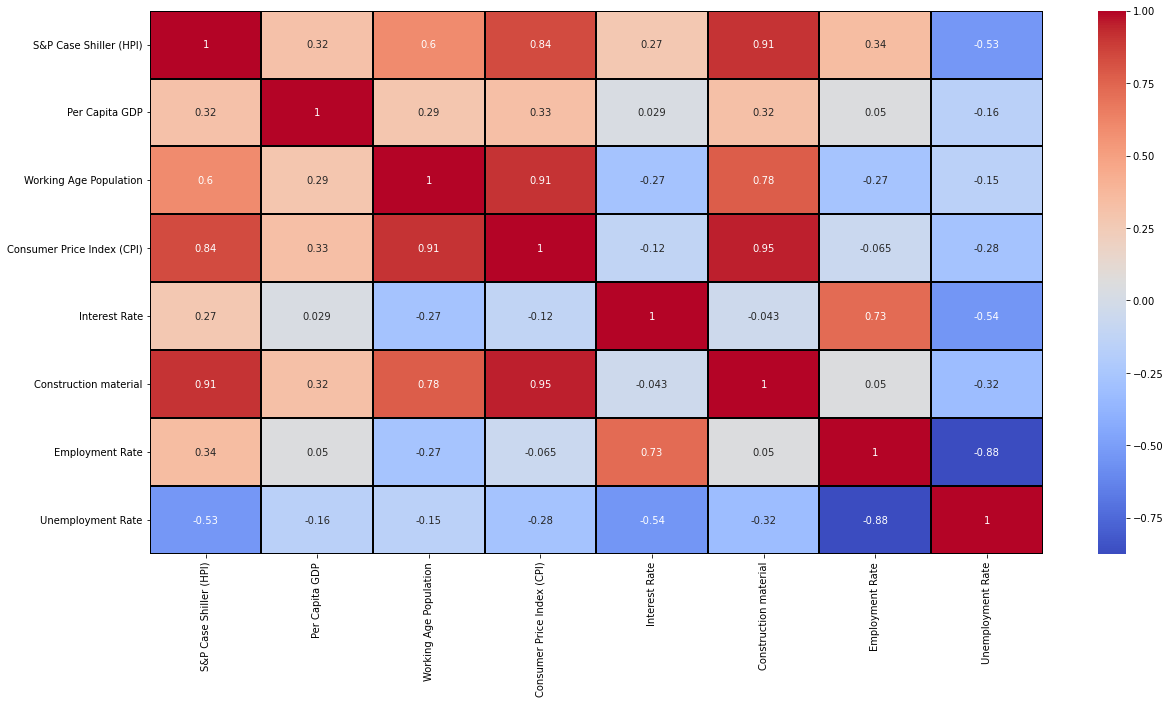

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(Df_US.corr(), annot = True, linewidth= 0.2, linecolor = 'black', cmap = 'coolwarm')
plt.show()

# Separating the target variable and the independent variable

In [70]:
#Target variable and the independent variable

x = Df_US.drop("S&P Case Shiller (HPI)", axis=1) #Atttition is target variable
y = Df_US['S&P Case Shiller (HPI)']

In [72]:
x

,Per Capita GDP,Working Age Population,Consumer Price Index (CPI),Interest Rate,Construction material,Employment Rate,Unemployment Rate
Date,,,,,,,
2003-01-01,50462.0,1.856353e+08,182.600,1.24,144.400,71.589831,5.8
2003-02-01,50462.0,1.858697e+08,183.600,1.26,145.200,71.521431,5.9
2003-03-01,50462.0,1.860851e+08,183.900,1.25,145.200,71.397567,5.9
2003-04-01,50796.0,1.864708e+08,183.200,1.26,145.900,71.377392,6.0
2003-05-01,50462.0,1.866491e+08,182.900,1.26,145.800,71.213067,6.1
...,...,...,...,...,...,...,...
2023-03-01,50462.0,2.082910e+08,301.808,4.65,331.729,71.897483,3.5
2023-04-01,66341.0,2.083929e+08,302.918,4.83,333.366,71.982265,3.4
2023-05-01,50462.0,2.086128e+08,303.294,5.06,337.473,71.932981,3.7


In [74]:
#Shape of x

x.shape

(247, 7)

In [73]:
y

Date
2003-01-01    128.461
2003-02-01    129.355
2003-03-01    130.148
2003-04-01    130.884
2003-05-01    131.735
               ...   
2023-03-01    298.637
2023-04-01    300.213
2023-05-01    302.566
2023-06-01    304.593
2023-07-01    306.767
Name: S&P Case Shiller (HPI), Length: 247, dtype: float64

In [75]:
#Shape of y

y.shape

(247,)

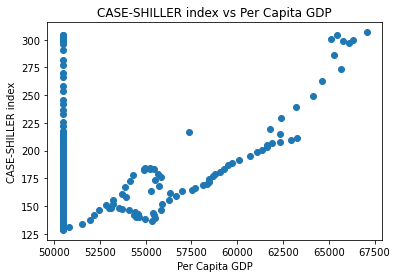

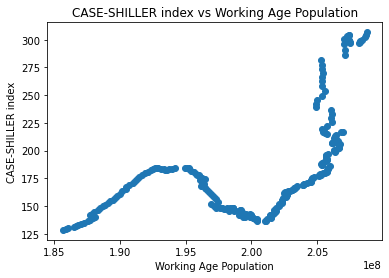

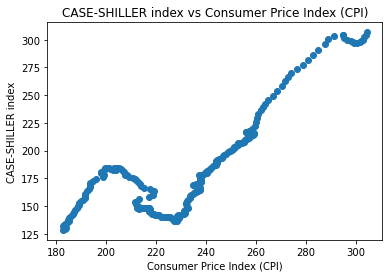

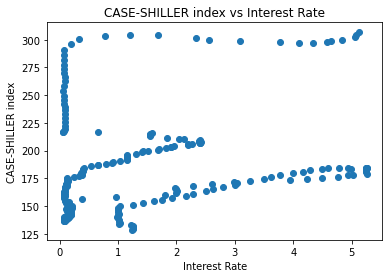

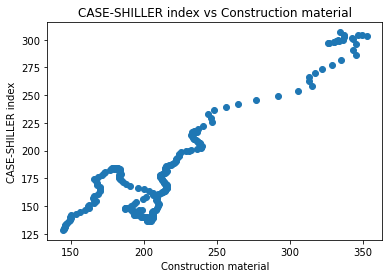

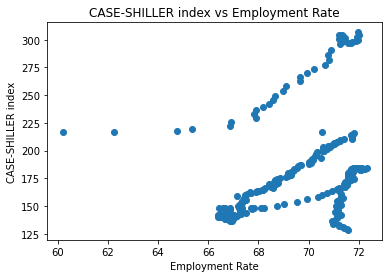

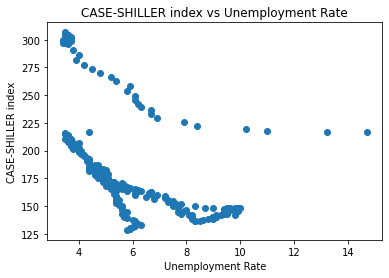

In [77]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in x.columns:
    plt.figure()
    plt.scatter(x = x[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

From the correlation matrix and the scatter plots, the following conclusions can be made-

1. Unemployment rate is negatively correlated with the home prices. Which makes sense.
2. Impact of the great recession is reflected in almost all the plots.
3. Interest rates have a slight negative impact on the home prices.
4. All the other variables are positively correlated with the home prices.

### Pairplot for visualizing relationships

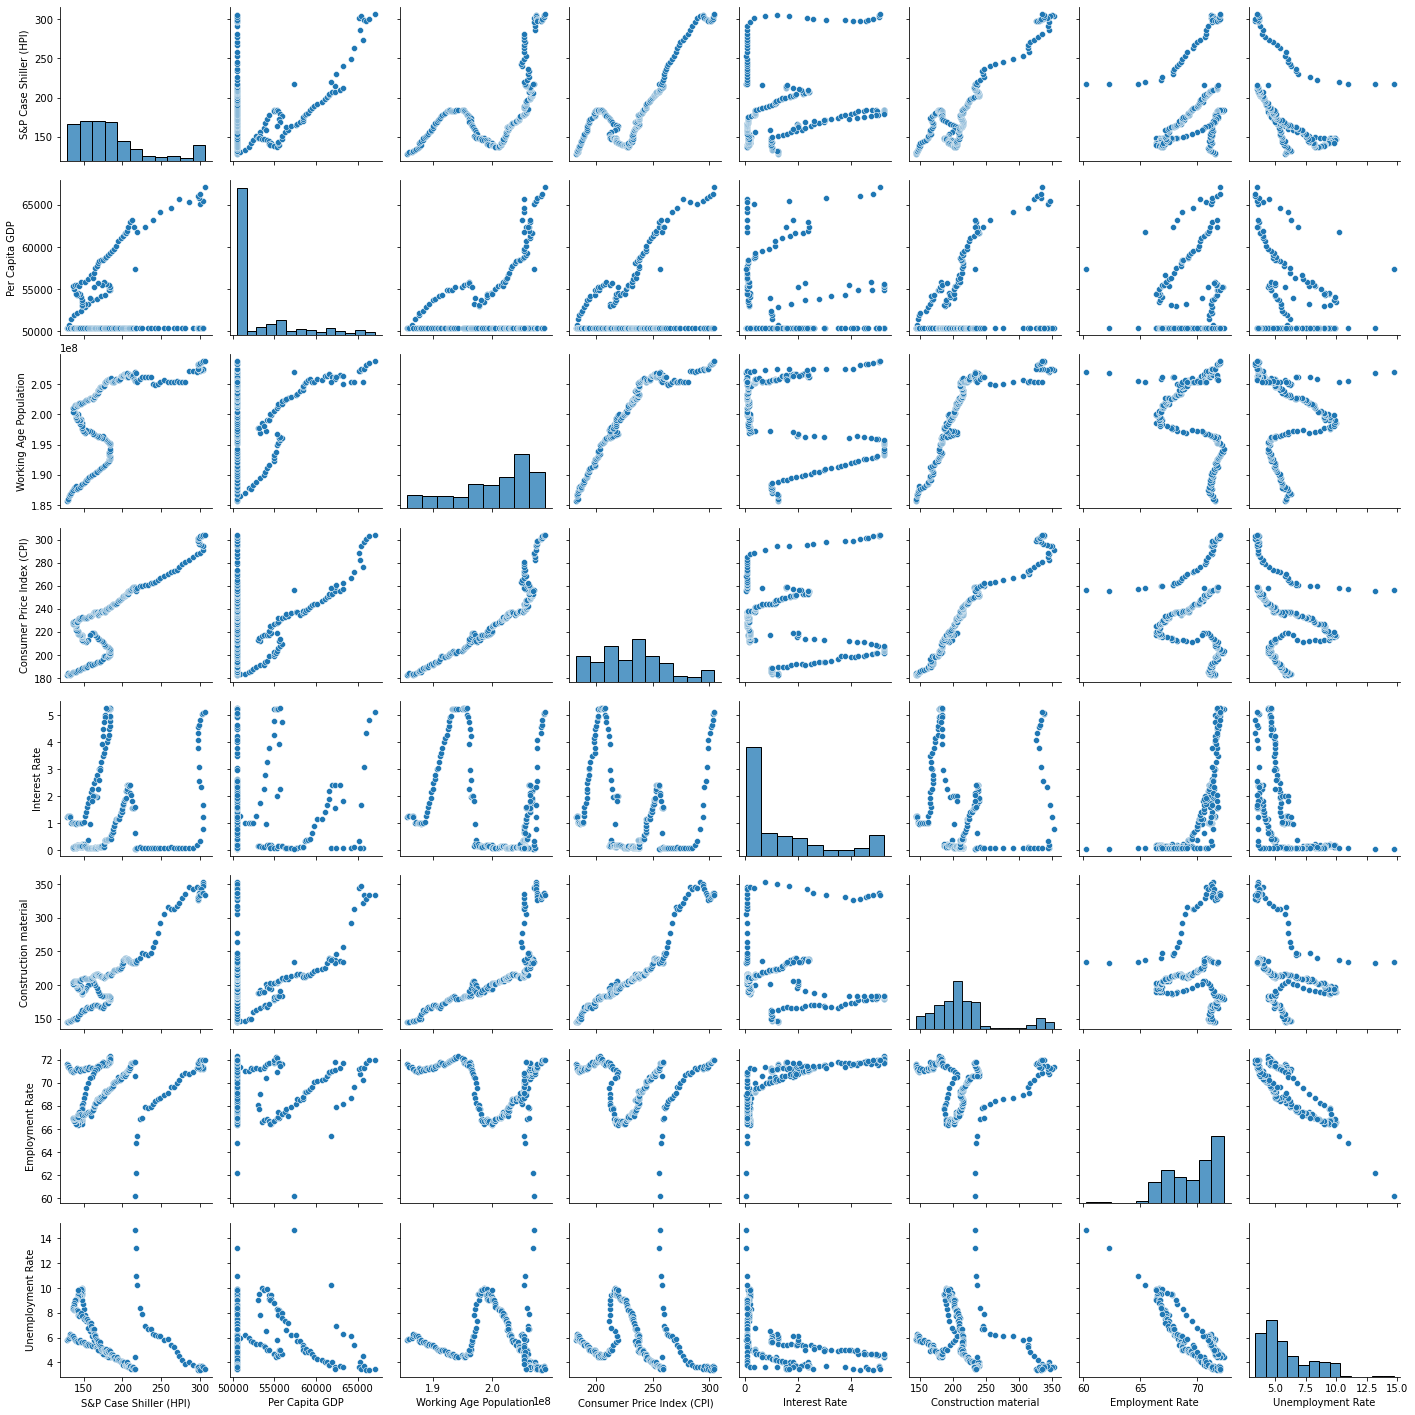

In [78]:
sns.pairplot(Df_US)

In [80]:
#Find columns from dataset
Df_US.columns

Index(['S&P Case Shiller (HPI)', 'Per Capita GDP', 'Working Age Population',
       'Consumer Price Index (CPI)', 'Interest Rate', 'Construction material',
       'Employment Rate', 'Unemployment Rate'],
      dtype='object')

THis is our key factors

In [81]:
factors = ['S&P Case Shiller (HPI)', 'Per Capita GDP', 'Working Age Population',
       'Consumer Price Index (CPI)', 'Interest Rate', 'Construction material',
       'Employment Rate', 'Unemployment Rate']

# Plotting histogram 

<Figure size 936x576 with 0 Axes>

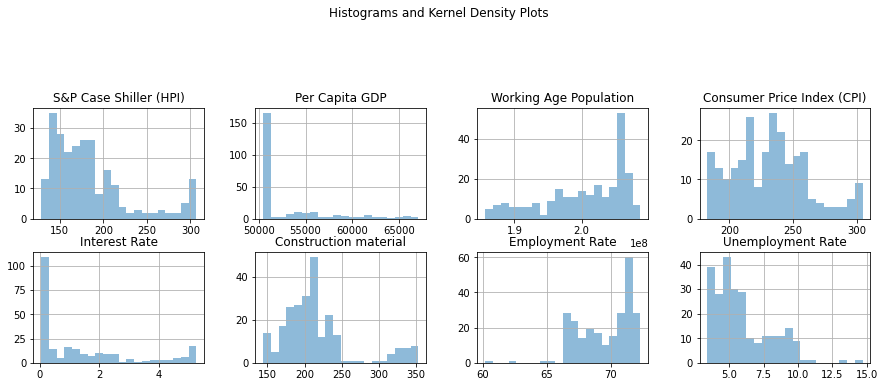

In [82]:
plt.figure(figsize=(13, 8))
Df_US[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

# Violin Plots:

Generates violin plots to visualize the distribution and density of each factor.

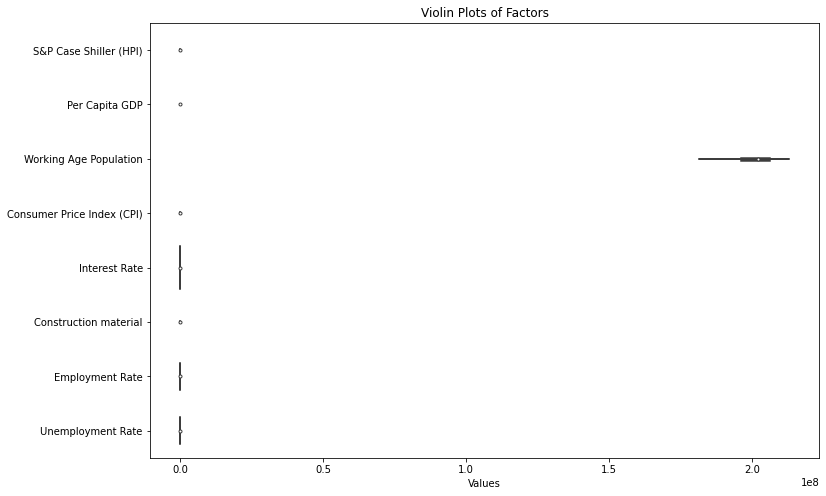

In [83]:
# Violin Plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=Df_US[factors], orient='h')
plt.title('Violin Plots of Factors')
plt.xlabel('Values')
plt.show()

## Calculate correlation coefficients

In [84]:
correlations = x.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
Interest Rate                 0.268716
Per Capita GDP                0.317440
Employment Rate               0.344754
Unemployment Rate             0.533471
Working Age Population        0.596818
Consumer Price Index (CPI)    0.838028
Construction material         0.908762
dtype: float64


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

# Creating train_test_split

In [87]:
#Import train test split from sklearn(Model selection)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (197, 7)
Training target vector size: (197,)
Test feature matrix size: (50, 7)
Test target vector size: (50,)


In [88]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

##### Explored various regression models, including Linear Regression, ElasticNet, Random Forest, Gradient Boosting, Support Vector Regression (SVR), and XGBoost.

In [89]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()}

Model: Linear Regression
Mean Squared Error: 162.19535321678447
R-squared: 0.9438906715077601
Coefficients:
Per Capita GDP: -0.8260068721275744
Working Age Population: -15.009249267708283
Consumer Price Index (CPI): 29.067653068887545
Interest Rate: 9.592042629026805
Construction material: 22.869004620089775
Employment Rate: 4.84652812158835
Unemployment Rate: -0.34489098548486624
Intercept: 181.5772182741116

Model: ElasticNet
Mean Squared Error: 318.4684304961933
R-squared: 0.889830075728274
Coefficients:
Per Capita GDP: 0.36703145644102264
Working Age Population: 2.6471265864052267
Consumer Price Index (CPI): 11.540891353840697
Interest Rate: 5.893429350464637
Construction material: 15.758231612519344
Employment Rate: 5.014658141794596
Unemployment Rate: -3.8743916288992746
Intercept: 181.57721827411171

Model: Random Forest
Mean Squared Error: 3.8001291441361915
R-squared: 0.9986853957882734
Feature Importance Analysis:
Per Capita GDP: 0.00013841517114776772
Working Age Population:

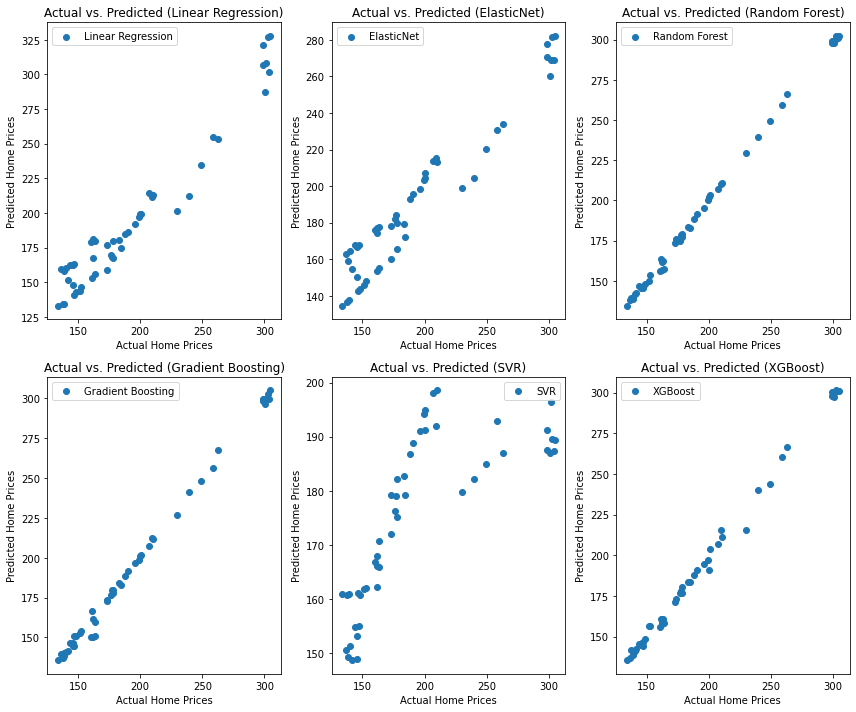


Best Model: RandomForestRegressor with MSE: 3.8001291441361915


In [94]:
from sklearn.metrics import r2_score, mean_squared_error

best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(x_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(x_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

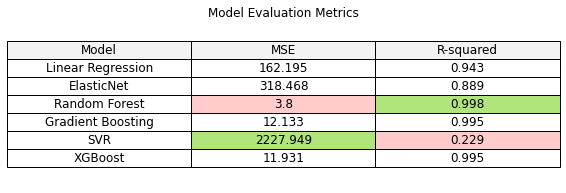

In [106]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
        'MSE': [162.195, 318.468, 3.800, 12.133, 2227.949, 11.931],
        'R-squared': [0.943, 0.889, 0.998, 0.995, 0.229, 0.995]}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3)) 

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center',
                 colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2.2, 1.5)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()